## Importing libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
import datetime
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

### Loading the dataset in a pandas data frame 

In [3]:
df1 = pd.read_csv("/Users/akshaygoyal/python/pr_final.csv")
df1.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,NaN,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,NaN,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,1/1/2015 1:00,EWR,NaN,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,NaN,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,NaN,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [4]:
df1.shape

(29101, 13)

There are a total of 29,101 rows and 13 columns in the dataset

In [5]:
df1.columns

Index(['pickup_dt', 'borough', 'pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp',
       'pcp01', 'pcp06', 'pcp24', 'sd', 'hday'],
      dtype='object')

### Sources of data and types of data

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    28965 non-null  object 
 2   pickups    28973 non-null  float64
 3   spd        28933 non-null  float64
 4   vsb        28951 non-null  float64
 5   temp       28992 non-null  float64
 6   dewp       28959 non-null  float64
 7   slp        28998 non-null  float64
 8   pcp01      28976 non-null  float64
 9   pcp06      28979 non-null  float64
 10  pcp24      28984 non-null  float64
 11  sd         28980 non-null  float64
 12  hday       28952 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.9+ MB


The dataset contains data from various sources related to uber pickups in New York city:
- Demographic information: borough(names of different places in New York)

- Weather information: 
 - spd(wind speed in miles per hour)
 - temp (temperature)
 - vsb (visibility)
 - avg precipitation in 1 hr, 6hr, 24hr (pcp01,pcp06,pcp24)
 - sd (snow depth)
 - slp(sea level pressure) 
 - dewp(dew point)
- Time information: pickup_dt(Time period of observations), hday(whethere is was a holiday or not)

- Columns containing discrete values: borough, hday
- Columns containing floar and integer values: spd, vsb, temp, dewp, pcp01, pcp06, pcp24

## Checking if there are any missing/null values in the dataset

### Total percentage of missing values in the dataset

In [7]:
df1.isna().sum().sum()/df1.size*100 

0.4150002775479563

## Imputation

In [8]:
df1.borough.unique()  #unique locations in dataset

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       nan], dtype=object)

In [9]:
df1['hday'].mode()

0    N
dtype: object

In [10]:
df1['hday'].fillna(df1['hday'].mode()[0], inplace= True) #Filled hildays with mode

In [11]:
##checking mode for holiday and working day
df1.groupby(['hday'])['borough'].apply(pd.Series.mode)

hday   
N     0    Bronx
Y     0    Bronx
Name: borough, dtype: object

In [12]:
#filled in missing value based on whether it is a holiday or a weekday.
df1['borough'] = df1.groupby(['hday'], sort=False)['borough'].apply(lambda x: x.fillna(x.mode().iloc[0]))




In [13]:
df1['spd'] = df1.groupby('borough')['spd'].transform(lambda x: x.fillna(x.mean()))
df1['vsb'] = df1.groupby('borough')['vsb'].transform(lambda x: x.fillna(x.mean()))
df1['temp'] = df1.groupby('borough')['temp'].transform(lambda x: x.fillna(x.mean()))
df1['dewp'] = df1.groupby('borough')['dewp'].transform(lambda x: x.fillna(x.mean()))
df1['slp'] = df1.groupby('borough')['slp'].transform(lambda x: x.fillna(x.mean()))
df1['pcp01'] = df1.groupby('borough')['pcp01'].transform(lambda x: x.fillna(x.mean()))
df1['pcp06'] = df1.groupby('borough')['pcp06'].transform(lambda x: x.fillna(x.mean()))
df1['pcp24'] = df1.groupby('borough')['pcp24'].transform(lambda x: x.fillna(x.mean()))
df1['sd'] = df1.groupby('borough')['sd'].transform(lambda x: x.fillna(x.mean()))

Filled in Pickups based on the day whether it is holiday or not. and filled in with the mean of a holiday or a weekday.


In [15]:
df1.pickups.mean()

490.7464881096193

In [17]:
##checking mean for holiday and working day
df1.groupby(['hday'])['pickups'].mean()

hday
N    492.339957
Y    445.846928
Name: pickups, dtype: float64

In [18]:
#filled in missing value based on whether it is a holiday or a weekday.
df1['pickups'] = df1.groupby(['hday'], sort=False)['pickups'].apply(lambda x: x.fillna(x.mean()))


In [19]:
df1.isna().sum()

pickup_dt    0
borough      0
pickups      0
spd          0
vsb          0
temp         0
dewp         0
slp          0
pcp01        0
pcp06        0
pcp24        0
sd           0
hday         0
dtype: int64

We decided to plot an correlation bar chart to understand what factors actually affect the number of pickups 

## Deciding upon the necessary columns in the data

<AxesSubplot:>

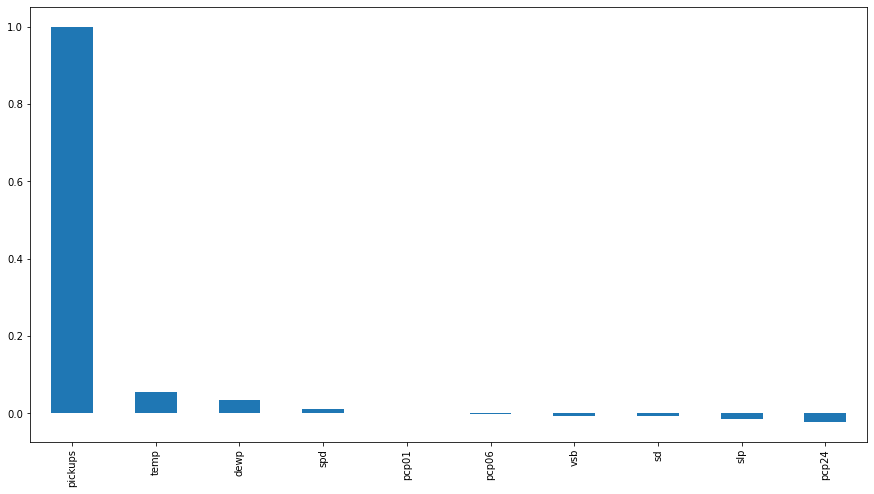

In [20]:
plt.figure(figsize=(15,8))
df1.corr()['pickups'].sort_values(ascending = False).plot(kind='bar')

1. Columns such as temp, dwp, spd are positively correlated with the number of pickups which means number of pickups increase as these coloumns value increases
2. Columns such as slp and pcp24 are negatively correlayed with the number of pickups which means number of pickups decrease as these coloumns value decreases
3. We decided to drop pcp01, pcp06 columns as they have almost zero corrleation with the number of pickups and they contain redundant information about precipitation

### Dropping pcp01, pcp06 coloumns

In [21]:
df1 = df1.drop(columns =['pcp01','pcp06'])
df1

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,445.846928,5.0,10.000000,30.0,7.0,1023.5,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,445.846928,5.0,10.000000,30.0,7.0,1023.5,0.0,0.0,Y
2,1/1/2015 1:00,EWR,445.846928,5.0,10.000000,30.0,7.0,1023.5,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,445.846928,5.0,10.000000,30.0,7.0,1023.5,0.0,0.0,Y
4,1/1/2015 1:00,Queens,445.846928,5.0,10.000000,30.0,7.0,1023.5,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...
29096,6/30/2015 23:00,EWR,0.000000,7.0,8.808227,75.0,65.0,1011.8,0.0,0.0,N
29097,6/30/2015 23:00,Manhattan,3828.000000,7.0,8.808227,75.0,65.0,1011.8,0.0,0.0,N
29098,6/30/2015 23:00,Queens,580.000000,7.0,8.808227,75.0,65.0,1011.8,0.0,0.0,N
29099,6/30/2015 23:00,Staten Island,0.000000,7.0,8.807950,75.0,65.0,1011.8,0.0,0.0,N


We also observed that the pickup_date column has every information about the day, month, year, pickup time stored in 1 cell and therefore we extracted specific information such as month, day, hour and made separate coloumns to perform a detail analysis of the data

<AxesSubplot:>

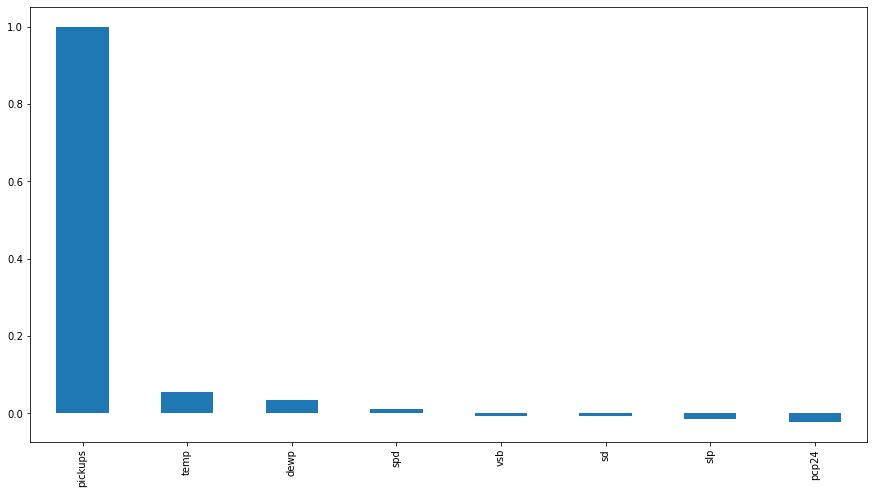

In [22]:
plt.figure(figsize=(15,8))
df1.corr()['pickups'].sort_values(ascending = False).plot(kind='bar')

### Extracting month, day, hour information and creating separate columns in the dataset for the time analysis

In [23]:
dt=df1.pickup_dt

In [30]:
#Extracting month of pickup from pickup_dt
month = []
for i in dt:
    t = datetime.datetime.strptime(i, "%m/%d/%Y %H:%M").strftime('%m')
    month.append(t)

In [32]:
#Extracting day of pickup from pickup_dt
day = []
for i in dt:
    p = datetime.datetime.strptime(i, "%m/%d/%Y %H:%M").strftime('%A')
    day.append(p)

In [35]:
#Extracting time(hour) of pickup from pickup_dt
time = []
for i in dt:
    t = datetime.datetime.strptime(i, "%m/%d/%Y %H:%M").strftime('%H')
    time.append(t)

In [37]:
#Adding new coloumn of month to the main dataframe 
month=pd.DataFrame(month)
df1['month'] = pd.DataFrame(month)

In [38]:
#Adding new column of day to the main dataframe
weekday=pd.DataFrame(day)
df1['day'] = pd.DataFrame(day)

In [39]:
#Adding new column time(hour) to the main dataframe
hour=pd.DataFrame(time)
df1['time'] = pd.DataFrame(time)

In [40]:
df1

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp24,sd,hday,month,day,time
0,1/1/2015 1:00,Bronx,445.846928,5.0,10.000000,30.0,7.0,1023.5,0.0,0.0,Y,01,Thursday,01
1,1/1/2015 1:00,Brooklyn,445.846928,5.0,10.000000,30.0,7.0,1023.5,0.0,0.0,Y,01,Thursday,01
2,1/1/2015 1:00,EWR,445.846928,5.0,10.000000,30.0,7.0,1023.5,0.0,0.0,Y,01,Thursday,01
3,1/1/2015 1:00,Manhattan,445.846928,5.0,10.000000,30.0,7.0,1023.5,0.0,0.0,Y,01,Thursday,01
4,1/1/2015 1:00,Queens,445.846928,5.0,10.000000,30.0,7.0,1023.5,0.0,0.0,Y,01,Thursday,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,6/30/2015 23:00,EWR,0.000000,7.0,8.808227,75.0,65.0,1011.8,0.0,0.0,N,06,Tuesday,23
29097,6/30/2015 23:00,Manhattan,3828.000000,7.0,8.808227,75.0,65.0,1011.8,0.0,0.0,N,06,Tuesday,23
29098,6/30/2015 23:00,Queens,580.000000,7.0,8.808227,75.0,65.0,1011.8,0.0,0.0,N,06,Tuesday,23
29099,6/30/2015 23:00,Staten Island,0.000000,7.0,8.807950,75.0,65.0,1011.8,0.0,0.0,N,06,Tuesday,23


# Visualizations

## Change lable size 

## 1. PIE CHART 
Since we were given pickup information on different boroughs in the New York City, we decided to find out the market share
of Uber pickups in the different boroughs to find out the range of the demand for Uber

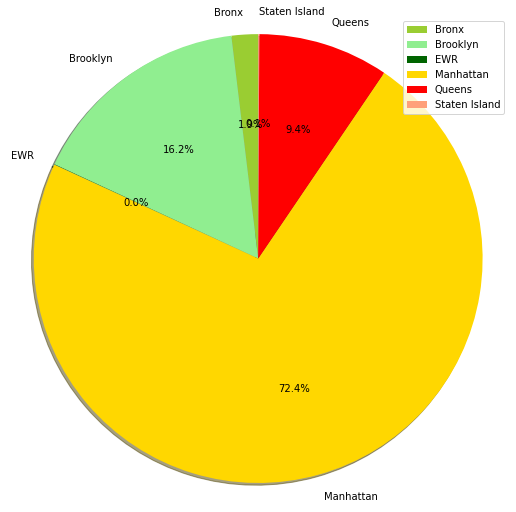

In [41]:
#Pie chart showing distribution of pickups by borough

colors = ['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red', 'lightsalmon', 'darkred']
total_pickups = df1.groupby('borough')['pickups'].sum()/df1.pickups.sum()*100
locations = df1.borough.unique()
labels = list(locations)
labels
plt.figure(figsize=(9,9))
plt.pie(total_pickups, labels = labels, colors = colors,startangle=90, autopct='%1.1f%%', shadow=True, radius =2)
plt.axis('equal')
plt.legend()
plt.show()


The pie chart gives us the distribution of market share of Uber pickups in New York city
1. Manhattan has the maximum share of pickups in the city almost 73% of all the pickups in the city
2. Bronx borrough has the minimum pickups in the city
3. We observed that EWR has zero pickups which is strange but then after diving deep into the problem
   we found out that EWR data was majorly missing in the dataset and therefore the graph was showing 0%
4. Brookyln has the second highest pickups in the city 

In [42]:
df5 = (df1.groupby(['borough'])['pickups'].sum()) 
df5

borough
Bronx            2.726281e+05
Brooklyn         2.311628e+06
EWR              4.562469e+03
Manhattan        1.033308e+07
Queens           1.342203e+06
Staten Island    1.135947e+04
Name: pickups, dtype: float64

We tried to find out the number of EWR pickups and it turns out that there is not much data of EWR provided in the dataset (0.3%) and therefore the market share is almost 0%


## 2. BOXPLOT
Next we wanted to understand the distribution of pickups in the different boroughs of New York to better understand the demand 

In [43]:
df6 = df1[(df1['borough'] == ("Manhattan"))]
loc = df6.borough.unique()

/Users/akshaygoyal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Pickups in Manhattan borough')

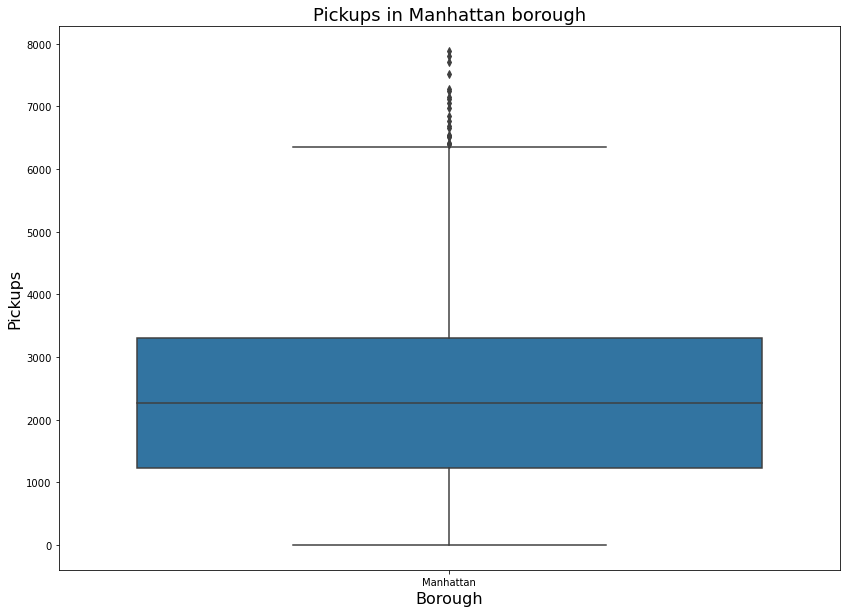

In [44]:
plt.figure(figsize=(14, 10))
x = df6.borough
y = df6.pickups
# make boxplot with Seaborn
sns.boxplot(x, y, data=df1)
# Set labels and title
plt.ylabel("Pickups", size=16)
plt.xlabel("Borough", size=16)
plt.title("Pickups in Manhattan borough", size=18)

1. The median value of the number of pickups in Manhattan is around 2300 
2. 25th percentile indicates that 25% of the pickups lie below 1100
3. 50th percentile indicates that 50% of the pickups lie below 2300
4. 75th percentile indicates that 75% of the pickups lie below 3200
5. Minimum is zero pickups and maximum value is around 6500 pickups
6. The outliers are shown as the black dots after the 75th percentile

# 3. BAR CHART

In [45]:
df2 = df1.copy()

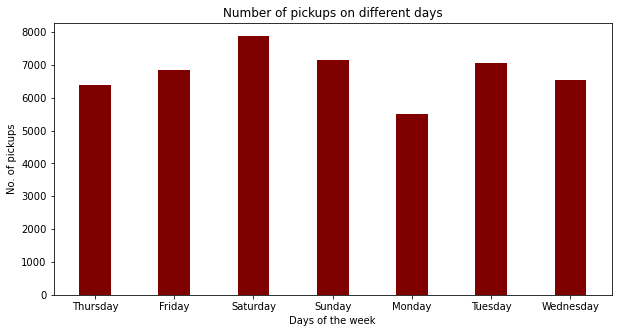

In [46]:
#Pickups on different days
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df1['day'],df1['pickups'], color ='maroon',width = 0.4) 
plt.xlabel("Days of the week")
plt.ylabel("No. of pickups")
plt.title("Number of pickups on different days")
plt.show()

1. Observing the pickup on different days we can say that from Monday onwards there is a gradual increase in the pickups and it stays the same for Wednesday and Thursday. 
2. The number of pickups reach the maxima on Friday, this might be because many people are traveling to and fro for work in different cities and they tend to return to their cities which exlains the maxima
3. During holidays, most people tend to go out more on Saturday and as Sunday comes the number of pickups decrease 


# 4. HEAT MAP

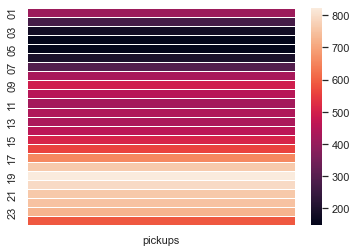

In [47]:
#Pickups depending on time
import seaborn as sns 
sns.set()
row = df1.groupby('time')['pickups'].mean()
columns=df1.time.unique()
mapi=pd.DataFrame(row, columns)

# Default heatmap
p1 = sns.heatmap(mapi,linewidth = 0.5)

In [ ]:
1. The maximum number of pickups are observed during 5-11:00 pm
2. Least number of pickups are observed in the time range of 1:00 - 5:00 am
3. Moderate number of pickups are observed in the range of 1:00 pm - 3:00 pm

This graph

In [48]:
df3 = df1.copy()

In [49]:
#Df with only non-holidays
delete_row = df3[df3["hday"]=='Y'].index
df3 = df3.drop(delete_row)

In [50]:
df4 = df1.copy()

In [51]:
#Df with only holidays
delete_row = df3[df3["hday"]=='N'].index
df4 = df4.drop(delete_row)

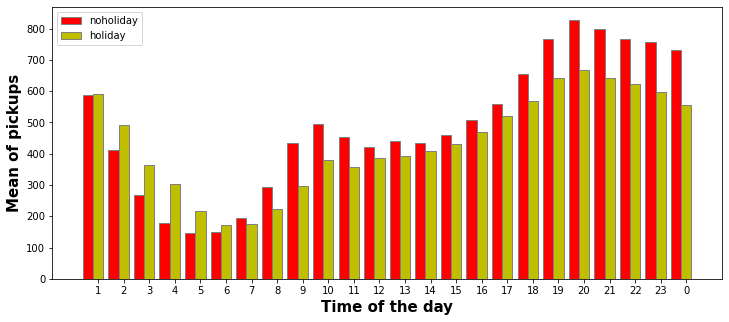

In [146]:
hr = df1.time.unique()
noholiday = df3.groupby('time')['pickups'].mean()
holiday = df4.groupby('time')['pickups'].mean()

barWidth = 0.4
fig = plt.subplots(figsize =(12, 5))

br1 = np.arange(24)
br2 = [x + barWidth for x in br1]


# creating the bar plot

plt.bar(br1,noholiday , color ='r', width = barWidth,
        edgecolor ='grey', label ='noholiday')
plt.bar(br2,holiday , color ='y', width = barWidth,
        edgecolor ='grey', label ='holiday')

plt.xlabel('Time of the day', fontweight ='bold', fontsize = 15)
plt.ylabel('Mean of pickups', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(hr))],
           ['1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19',
              '20','21','22','23','0'])
 
plt.legend()
plt.show()

1. During the working days(no holiday):
- We observe that the number of pickups increase from 7:00 am and reach a peak at 11:00am as most of the
people will be travelling to work during these hours
- Again, we observe a linear upwards trend from 3:00 o clock in the evening till reaching its maxima at 8:00 pm 
as most of th people will now be leaving their offices
- It starts showing a downaward decreasing movement from 8:00pm to 4:00 am in the morning

2. During the holidays:
- The time from 1:00 AM to 6:00 AM the number of pickups were more than the days when there was no holiday which was an interesting observation. People tend to go outside more on holidays and therefore this trend is observed 

3. The most demand for Ubers during the day are from 7:00 am till 11:00 am in the morning and 
from 6:00 pm to 8:00 pm in the evening during the working days

4. During the holidays, the trend for demand is the same as that of non holidays with one exception there is a higher demand in the night time also from 1:00AM till 6:00 AM 

Business strategy: During the peak hours, there are many people travelling to and from work and New York has the 
maximum immigrant population working in the top MNCs so the demand will always exccedd the supply during the peak hours
Therefore we can devise a strategy to providr a small peak hour bonus per ride to the drivers who will be working in those hours to get maximum cars on the road thereby increasing the profits.

During the holidays, we need more drivers in the nightime from 1:00 AM till 6:00 AM than a normal working day, similarly holiday hours bonus can be provided to meet the demand on the holidays.


# 5. SCATTER PLOT

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


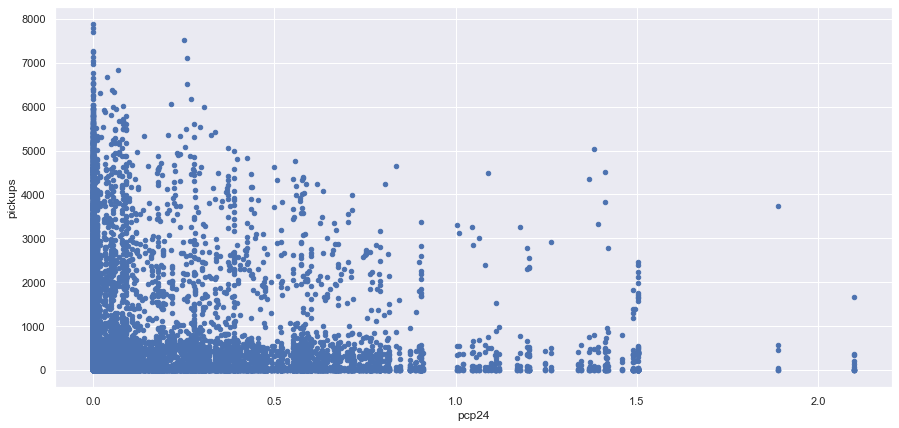

In [52]:
df1.plot.scatter(x='pcp24', y='pickups', figsize=(15,7));

Observing the graph we can say that the number of pickups decrease as the rainfall increase.
Maximum pickups are observed in the range 0- 0.8 and then it starts to decrease significantly.
But this is an opportunity as the demand still says the same. Generally its observed that there is a surge in the prices 
during the rainy days as the number of drivers are less on the road.

Weather forecast can be done ahead of time so that we exactly know what will be the demand in the upcoming days and devise
strategies accordingly to attract more drivers. This will help us earn more revenue and increase the customer satisfication
as they won't need to pay the surge price which generally happens during the rainy days.

# 6. HISTOGRAM

(array([ 739., 4115., 6908., 4622., 5525., 4916., 2276.]),
 array([ 2.        , 14.42857143, 26.85714286, 39.28571429, 51.71428571,
        64.14285714, 76.57142857, 89.        ]),
 <BarContainer object of 7 artists>)

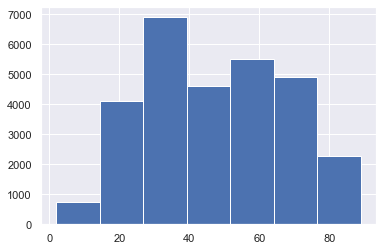

In [54]:
plt.hist(df1['temp'], bins = 7)

New York experiences a varied range of temperature.
1. Maximum number of days the temp range was between 23-40 F. It must be the winter season
2. During the summers, the temp ranhe was between 50-80 F

To better understand how temperature plays a role in deciding th number of pickups we decided to plot a line chart based upon the waether conditions and pickup

# 7. LINE PLOT

We seggrgeated the temp range in 3 separate groups(cold, moderate, hot) and added a new coloumn in the dataset called new_temp

In [55]:
new_t = []
tem = df1.temp
tem
for i in df1['temp']:
    if i <= 50:
        new_t.append('cold')
    elif i <=73:
        new_t.append('moderate')
    else:
        new_t.append('hot')

In [58]:
n_t=pd.DataFrame(new_t)
df1['new_temp'] = pd.DataFrame(new_t)
df1

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp24,sd,hday,month,day,time,new_temp
0,1/1/2015 1:00,Bronx,445.846928,5.0,10.000000,30.0,7.0,1023.5,0.0,0.0,Y,01,Thursday,01,cold
1,1/1/2015 1:00,Brooklyn,445.846928,5.0,10.000000,30.0,7.0,1023.5,0.0,0.0,Y,01,Thursday,01,cold
2,1/1/2015 1:00,EWR,445.846928,5.0,10.000000,30.0,7.0,1023.5,0.0,0.0,Y,01,Thursday,01,cold
3,1/1/2015 1:00,Manhattan,445.846928,5.0,10.000000,30.0,7.0,1023.5,0.0,0.0,Y,01,Thursday,01,cold
4,1/1/2015 1:00,Queens,445.846928,5.0,10.000000,30.0,7.0,1023.5,0.0,0.0,Y,01,Thursday,01,cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,6/30/2015 23:00,EWR,0.000000,7.0,8.808227,75.0,65.0,1011.8,0.0,0.0,N,06,Tuesday,23,hot
29097,6/30/2015 23:00,Manhattan,3828.000000,7.0,8.808227,75.0,65.0,1011.8,0.0,0.0,N,06,Tuesday,23,hot
29098,6/30/2015 23:00,Queens,580.000000,7.0,8.808227,75.0,65.0,1011.8,0.0,0.0,N,06,Tuesday,23,hot
29099,6/30/2015 23:00,Staten Island,0.000000,7.0,8.807950,75.0,65.0,1011.8,0.0,0.0,N,06,Tuesday,23,hot


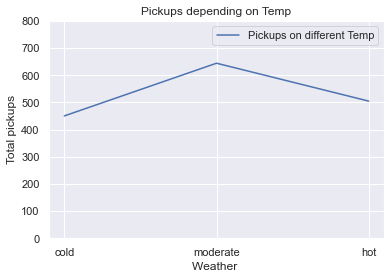

In [59]:
day = df1.new_temp.unique()
tot_pickups = df1.groupby('new_temp')['pickups'].mean()
plt.plot(day,tot_pickups,label = "Pickups on different Temp")
plt.title("Pickups depending on Temp")
plt.xlabel("Weather ")
plt.ylabel("Total pickups")
plt.ylim([0, 800])
plt.legend(loc='best')
plt.show()

1. Weather plays a major role in deciding the number of pickups. In both the extreme hot and cold weathers the number of 
pickups starts decreasing. 
2. Maximum pickups are during the moderate weather.  One of the reason can be not many people tend to go outside during 
extreme weather conditions and therefore the demand will be less. 